# Práctica 2. _Clustering_ de regiones vinícolas

En una práctica anterior ya utilizamos los datos de las características de unos vinos pertenecientes a tres bodegas italianas (fichero de datos ``wines`` incorporado a ``R`` o ``wine.csv`` que se puede encontrar en el libro de la asignatura. 

En esta práctica vamos a aplicar un aprendizaje no supervisado como el que propone los mapas auto-organizativo de Kohonen para obtener un agrupamiento de los datos.

Para ello vamos a utilizar uno de los paquetes que están a nuestra disposición en R, el denominado paquete de Kohonen.

Como en la práctica anterior lo primero que hacemos es cargar la librería 
 
## Cargar el paquete específico

A continuación cargamos el paquete específico que vamos a usar en esta sección para trabajar con mapas auto-organizativos de Kohonen:


In [2]:
library("kohonen")



## Carga de los datos.

Cargamos el archivo  con ``data("wines")`` que ya contiene el nombre de cada columna y no incluye la primera de las columnas que indica la bodega a la que pertenecen los datos de cada instancia (fila).  

En el caso de los mapas auto-organizativos, donde se va a establecer una relación de proximidad entre los atributos, es conveniente escalar los datos.

Estos datos provienen de

https://archive.ics.uci.edu/ml/datasets/Wine

In [9]:
data(wines)

In [10]:
head(wines,10)

alcohol malic acid ash  ash alkalinity magnesium tot. phenols flavonoids
 [1,] 13.20   1.78       2.14 11.2           100       2.65         2.76      
 [2,] 13.16   2.36       2.67 18.6           101       2.80         3.24      
 [3,] 14.37   1.95       2.50 16.8           113       3.85         3.49      
 [4,] 13.24   2.59       2.87 21.0           118       2.80         2.69      
 [5,] 14.20   1.76       2.45 15.2           112       3.27         3.39      
 [6,] 14.39   1.87       2.45 14.6            96       2.50         2.52      
 [7,] 14.06   2.15       2.61 17.6           121       2.60         2.51      
 [8,] 14.83   1.64       2.17 14.0            97       2.80         2.98      
 [9,] 13.86   1.35       2.27 16.0            98       2.98         3.15      
[10,] 14.10   2.16       2.30 18.0           105       2.95         3.32      
      non-flav. phenols proanth col. int. col. hue OD ratio proline
 [1,] 0.26              1.28    4.38      1.05     3.40     1050   
 [2,] 0.30              2.81    5.68      1.03     3.17     1185   
 [3,] 0.24              2.18    7.80      0.86     3.45     1480   
 [4,] 0.39              1.82    4.32      1.04     2.93      735   
 [5,] 0.34              1.97    6.75      1.05     2.85     1450   
 [6,] 0.30              1.98    5.25      1.02     3.58     1290   
 [7,] 0.31              1.25    5.05      1.06     3.58     1295   
 [8,] 0.29              1.98    5.20      1.08     2.85     1045   
 [9,] 0.22              1.85    7.22      1.01     3.55     1045   
[10,] 0.22              2.38    5.75      1.25     3.17     1510

In [11]:
nrow(wines)

[1] 177

In [12]:
Swine<-scale(wines)

In [13]:
head(Swine,10)

alcohol   malic acid  ash        ash alkalinity magnesium   tot. phenols
 [1,] 0.2551008 -0.50020530 -0.8221529 -2.4930372      0.02909756 0.5710456   
 [2,] 0.2056453  0.01796903  1.1045562 -0.2748590      0.09964918 0.8104843   
 [3,] 1.7016732 -0.34832662  0.4865552 -0.8144158      0.94626865 2.4865554   
 [4,] 0.3045563  0.22345196  1.8316163  0.4445501      1.29902677 0.8104843   
 [5,] 1.4914875 -0.51807338  0.3047901 -1.2940219      0.87571703 1.5607256   
 [6,] 1.7264010 -0.41979894  0.3047901 -1.4738742     -0.25310893 0.3316069   
 [7,] 1.3183934 -0.16964581  0.8864382 -0.5746128      1.51068164 0.4912327   
 [8,] 2.2704111 -0.62528187 -0.7130939 -1.6537265     -0.18255731 0.8104843   
 [9,] 1.0711160 -0.88436903 -0.3495639 -1.0542189     -0.11200568 1.0978108   
[10,] 1.3678488 -0.16071177 -0.2405049 -0.4547113      0.38185567 1.0499230   
      flavonoids non-flav. phenols proanth    col. int.    col. hue   OD ratio 
 [1,] 0.7375437  -0.8208101        -0.5370519 -0.290306650  0.4059482 1.1284966
 [2,] 1.2181890  -0.4999191         2.1399040  0.268966296  0.3186634 0.8023031
 [3,] 1.4685250  -0.9812556         1.0376281  1.181011408 -0.4232572 1.1994082
 [4,] 0.6674496   0.2220856         0.4077561 -0.316119247  0.3623058 0.4619272
 [5,] 1.3683906  -0.1790282         0.6702028  0.729290952  0.4059482 0.3484686
 [6,] 0.4972211  -0.4999191         0.6876992  0.083976014  0.2750210 1.3837785
 [7,] 0.4872077  -0.4196964        -0.5895412 -0.002065978  0.4495905 1.3837785
 [8,] 0.9578395  -0.5801419         0.6876992  0.062465516  0.5368753 0.3484686
 [9,] 1.1280680  -1.1417010         0.4602454  0.931489632  0.2313786 1.3412315
[10,] 1.2982965  -1.1417010         1.3875569  0.299080993  1.2787959 0.8023031
      proline    
 [1,]  0.96830550
 [2,]  1.39703475
 [3,]  2.33388755
 [4,] -0.03206274
 [5,]  2.23861439
 [6,]  1.73049083
 [7,]  1.74636969
 [8,]  0.95242664
 [9,]  0.95242664
[10,]  2.42916072

## Definición de una malla. 

La elección de la red bidimensional, tanto en lo que se refiere al número de neuronas como en tipo de entorno, depende del tipo de datos que se esté analizando. En este caso concreto, estamos tratando con instancias que contienen trece atributos y parece conveniente empezar con una malla de $5 \times 5$ neuronas que denominaremos ``grid.wine``

In [14]:
grid.wine<- somgrid(5,5,"hexagonal")

## Generación del mapa auto-organizativo. 

A partir de los datos escalados recogidos en `Swine`, entrena las neuronas que forman la red bidimensional recogida en `malla.wine` mediante el comando específico del paquete `kohonen`, denominado `som`: 

In [16]:
som.wine<-supersom(Swine, grid = grid.wine)

## Medida de la convergencia

El algoritmo de Kohonen que se implementa en el comando `som`, converge en un número de pasos razonable (al menos, en los ejemplo sencillos). Para visualizar esta convergencia se suele representar la _distancia media a la neurona más cercana_ frente al número de pasos:

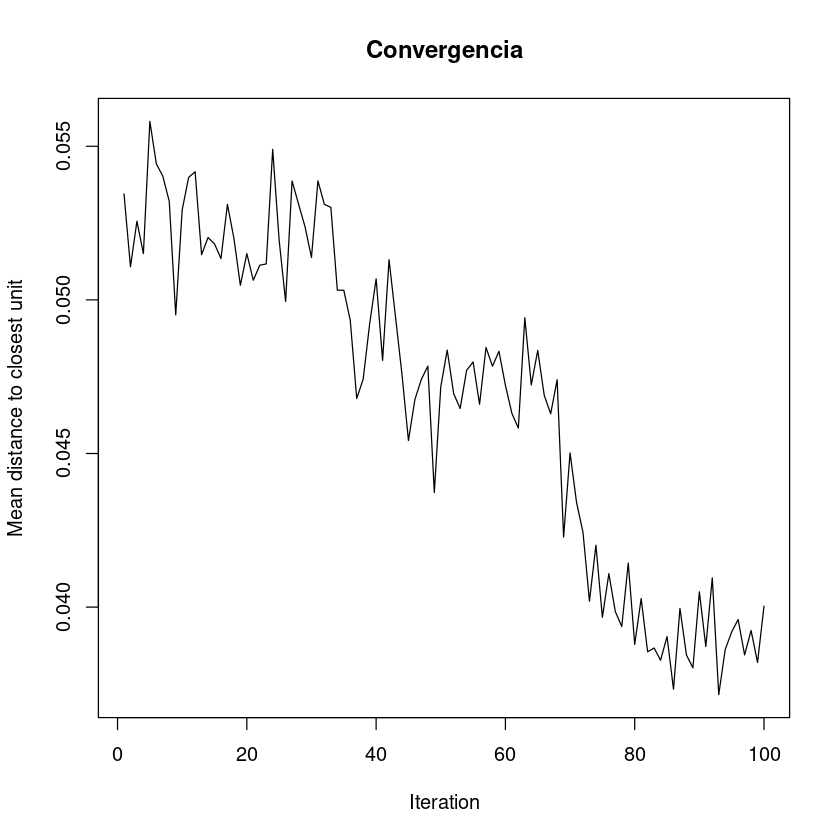

In [17]:
plot(som.wine, type = "changes", main = "Convergencia")

## Resumen del mapa SOM

Comandos específicos de este paquete permiten obtener un resumen de las caracterísiticas del mapa generado. En concreto, la asignación de cada instancia a una neurona del SOM.

In [18]:
summary(som.wine)


SOM of size 5x5 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 177 objects.
Mean distance to the closest unit in the map: 3.432.


In [19]:
print(som.wine$grid)


$pts
        x         y
 [1,] 1.5 0.8660254
 [2,] 2.5 0.8660254
 [3,] 3.5 0.8660254
 [4,] 4.5 0.8660254
 [5,] 5.5 0.8660254
 [6,] 1.0 1.7320508
 [7,] 2.0 1.7320508
 [8,] 3.0 1.7320508
 [9,] 4.0 1.7320508
[10,] 5.0 1.7320508
[11,] 1.5 2.5980762
[12,] 2.5 2.5980762
[13,] 3.5 2.5980762
[14,] 4.5 2.5980762
[15,] 5.5 2.5980762
[16,] 1.0 3.4641016
[17,] 2.0 3.4641016
[18,] 3.0 3.4641016
[19,] 4.0 3.4641016
[20,] 5.0 3.4641016
[21,] 1.5 4.3301270
[22,] 2.5 4.3301270
[23,] 3.5 4.3301270
[24,] 4.5 4.3301270
[25,] 5.5 4.3301270

$xdim
[1] 5

$ydim
[1] 5

$topo
[1] "hexagonal"

$neighbourhood.fct
[1] bubble
Levels: bubble gaussian

$toroidal
[1] FALSE

attr(,"class")
[1] "somgrid"


In [20]:
getCodes(som.wine)
dim(getCodes(som.wine))


alcohol      malic acid  ash         ash alkalinity magnesium  
V1   1.323384396 -0.49922036  0.12837984 -1.03804227     0.60379300
V2   1.094305615 -0.50087721  1.11834968 -0.21878256     1.42577305
V3   0.312801365 -0.04914830  0.92587636  0.30749748     0.91854012
V4   0.347546455  0.92076882  0.69912429  1.08242005     0.89166669
V5   0.904568525  0.52577097  0.51734164  0.60703763    -0.21862201
V6   1.325965863 -0.28187387 -0.24394906 -1.40419889     0.37284988
V7   0.887513938 -0.48203498  0.54047226 -0.56092442     0.01032780
V8   0.387951618 -0.30938759  1.78264768  0.51642086     1.23265504
V9  -0.506248909  0.06053128  0.24144823  0.48577319     0.82030839
V10 -0.186431402  0.42608845 -0.34130380  0.01326743    -0.23870013
V11  0.644036440  0.08875480 -0.43771756 -0.96981929     0.24150731
V12  0.387696301 -0.29579096  0.72007997  0.23839882    -0.27213742
V13 -0.884442636  0.83724160  1.45136087  1.72767604     0.41256644
V14 -0.001112193  1.02264032  0.93067971  1.14405856    -0.03338261
V15  0.329191847  1.90607127 -0.17954885  0.42702077    -0.69334576
V16 -0.686583878 -0.87988864 -1.28535827 -0.67223551     3.14808508
V17 -1.061050909 -0.71939420 -0.14675308 -0.21694836    -0.49573564
V18 -0.993996640  0.89755871 -0.42092075  0.40570679    -0.54851527
V19 -1.298489606  0.02118540  0.85661653  0.95624546    -0.50946025
V20 -0.779952644  0.66062862 -0.51629272 -0.23484970    -0.77519855
V21 -0.564367238 -1.05642951 -1.70177313 -0.67354600    -0.93746626
V22 -0.915040260 -0.26853135 -1.13421772  0.10711276    -0.78471070
V23 -1.443279935 -0.85627143  0.07245378  1.05755479    -1.09468488
V24 -0.611085621 -0.64500520 -0.10960695  0.59156459    -0.87542209
V25 -0.373734149 -0.97956172 -1.51854939 -1.10666025    -0.17042457
    tot. phenols flavonoids  non-flav. phenols proanth      col. int. 
V1   1.601417579  1.52509741 -0.67773656        1.025072016  1.0210456
V2   0.921057447  0.89646508  0.13640751       -0.006968617  0.4366152
V3  -0.006932693  0.09776818 -0.44747838       -0.046454170  0.5007872
V4  -0.972667826 -0.93448812 -0.17640519       -0.412745184  1.7040443
V5  -0.411408472 -1.16008033  1.22138166        0.185006764  2.1597092
V6   1.218059424  1.24053096 -0.86567111        1.022573838  0.3591889
V7   0.577386526  0.81895258 -0.49244677        0.715213918  0.1029263
V8   0.749838415  0.71685677 -0.03332661        0.237642858 -0.3816876
V9  -1.322797710 -0.85286577 -0.99685494       -0.876177203 -0.2553542
V10 -1.396192895 -1.39682700  0.54585296       -1.120615625  1.0483895
V11  0.538354266  0.68883529 -0.81729818       -0.010724070 -0.2000614
V12  0.523956176  0.63149090 -0.84859710        0.272877248 -0.4405691
V13  0.516418193  0.99469269  0.53389010        0.320776421 -0.6383118
V14 -0.794440265 -1.41390278  1.58107927       -1.204887013  0.1400452
V15 -1.129942341 -1.39384937  1.14659904       -0.916259388  0.3628750
V16 -0.111563977 -0.07026252 -0.82016270        1.950415154 -0.8610272
V17  0.939703371  0.68300016 -0.90530352        0.714386285 -0.6434116
V18  0.752634317  0.66567326 -0.41188900        0.914699166 -0.8768989
V19 -0.609303147 -0.05290393  1.64916757       -0.397093678 -0.8375293
V20 -0.738842337 -0.76477846  0.81463290       -0.885897303 -0.6517824
V21  0.157216036  0.32067701 -0.70541654        0.002021756 -0.5578383
V22 -0.223574291 -0.08880057 -0.34477586       -0.002501682 -1.1832971
V23 -0.043126285 -0.04760994  0.48995255       -0.082183002 -1.1673077
V24 -1.041200452 -0.40646795  0.73825879       -0.267970878 -0.8519267
V25 -0.469021900 -0.75984819  0.45432978       -1.596419467 -0.6972856
    col. hue    OD ratio   proline   
V1   0.52349820  0.6473523  2.1556467
V2   0.89273040  0.4564928  1.6474251
V3  -0.05674928 -0.2751167  0.5718665
V4  -1.34044592 -1.5376869 -0.3985470
V5  -1.62714715 -1.3140666 -0.3345873
V6   0.25432983  0.9942160  0.8081123
V7   0.61690438  0.5646760  1.3969327
V8   0.78781174  0.6821369  0.4346385
V9  -0.68597068 -1.3868438 -0.3633189
V10 -1.234

[1] 25 13

In [21]:
print(som.wine$unit.classif)

  [1] 11  7  1  8  1  7  2  6  6  1  7  7  6  1  2  2  2  1 11  6 12 11 12 12  8
 [26]  7 11  8 11  7  1  7  2  7 12  8  7 11  6  6 11  6 11 11 11  6  6  7  1  6
 [51]  7  1  2 11  7  6  7  1 25 25 25 25 17 24 17 21 21 25 16  9 12 24  8 17 25
 [76] 21 20 16 13 21 17 23 15 17 21 24 23 19 23 24 24 24 22 17 16  9 21 17 17 21
[101] 22 18 22 22 19 22 24 22 17 18 22 19 23 23 23 22 22 20 22 18 13 13 18 18 22
[126] 18 19 23 20  9  9  9  9 20 10 15 14 15 14 14 10 14 15 10 15 15 15  5  4  4
[151]  4  4  5 10 15  5 14  5  5 15 14 14 10 10 15  4 10  4  4 10 10  5 15  4  4
[176]  5  5


## Número de asignaciones a cada neurona  

Mediante el comando `table`, obtén una tabla donde aparezcan el número de instancias asignadas a cada neurona.  Comenta si se puede asegurar un agrupamiento de los datos a partir de esta tabla.

In [22]:
nb<-table(som.wine$unit.classif)
print(nb)


 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
 9  6  9  8 11 13  5  6  9 11  5  3  7 11  3  9  6  4  4  7 11  7  7  6 


## Visualización de los _clusters_

La tabla anterior permite entrever la existencia de un agrupamiento de los datos que, posiblemente, tiene que ver son su distinta fabricación. Sin embargo, este agrupamiento se puede hacer más evidente a partir de las representaciones bidimensionales que están implementadas en el paquete `kohonen`. En particular, se puede representar la distancia entre vecinos (_type= "dist.neighbours"_) o el número de instancias que están asociadas a cada neurona (_type= "count"_)

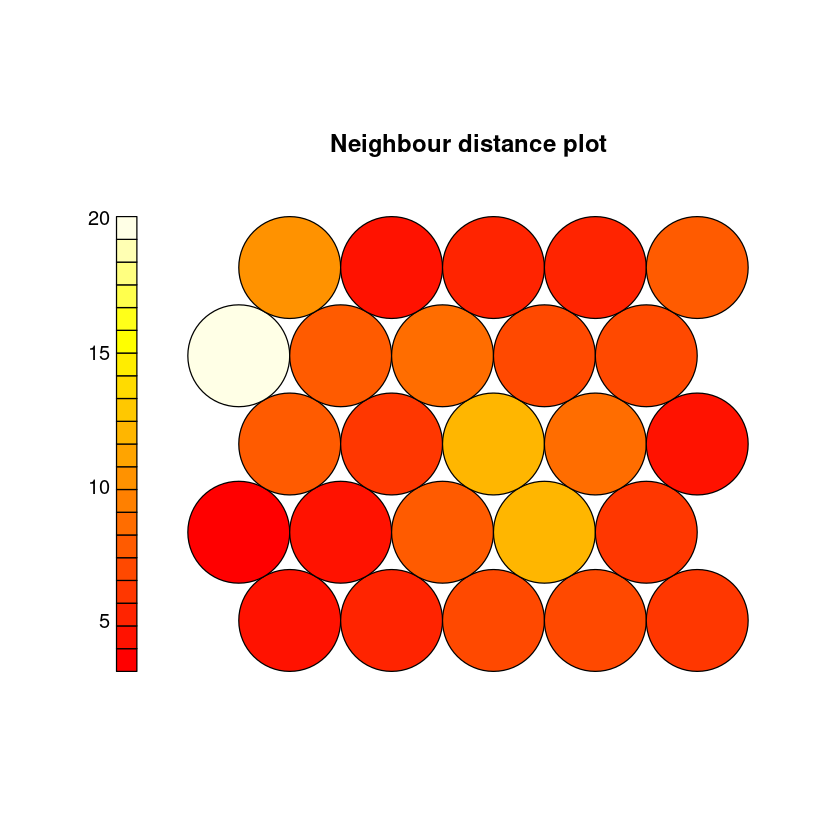

In [23]:
plot(som.wine, type="dist.neighbours")

Número de instancias asociadas a cada neurona

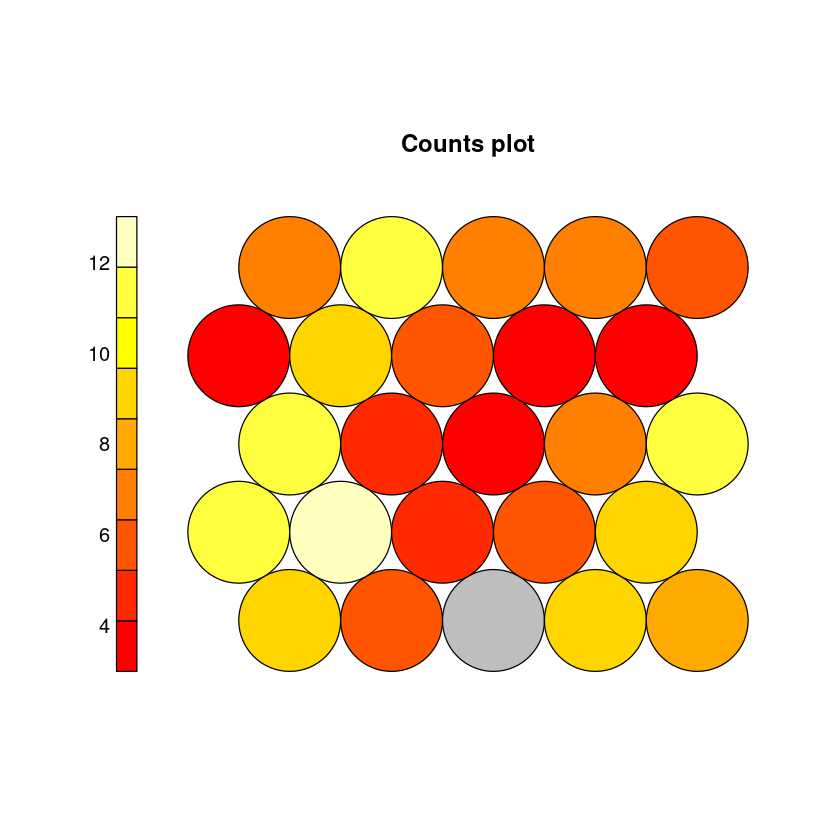

In [24]:
plot(som.wine, type="count")

## Gráfico de códigos

Otro gráfico muy útil para entender el agrupamiento de los datos es el que representa la distribución de los atributos en cada neurona, esto es el vector representativo al que ha convergido cada neurona después del entrenamiento. Haz esta figura y comenta cómo están agrupados los datos en `wine.csv`. 

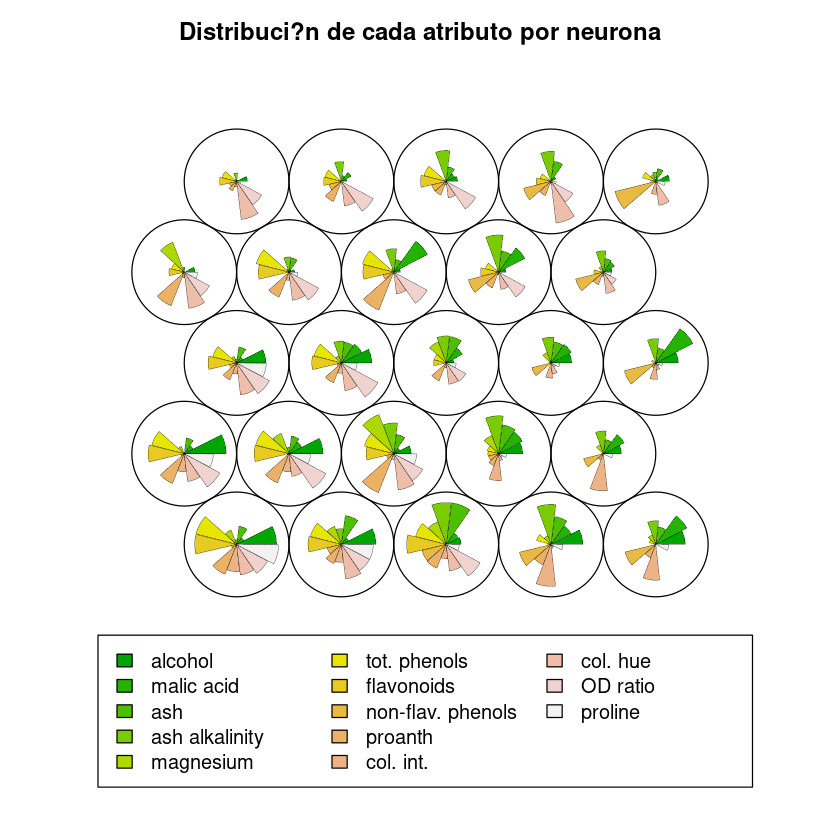

In [20]:
plot(som.wine, type="codes", codeRendering = "segments", main = "Distribuci?n de cada atributo por neurona")

## _Clustering_


Podemos realizar un _clustering_ jerárquico con la función `hclust` de `R` usando las distancias entre los vectores prototípicos de las neuronas y añadirlo a la representación.

In [26]:
som_cluster<-cutree(hclust(dist(getCodes(som.wine))),3)
som_cluster

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  1   1   1   2   2   1   1   1   2   2   1   3   3   2   2   1   3   3   3   2 
V21 V22 V23 V24 V25 
  3   3   3   3   3

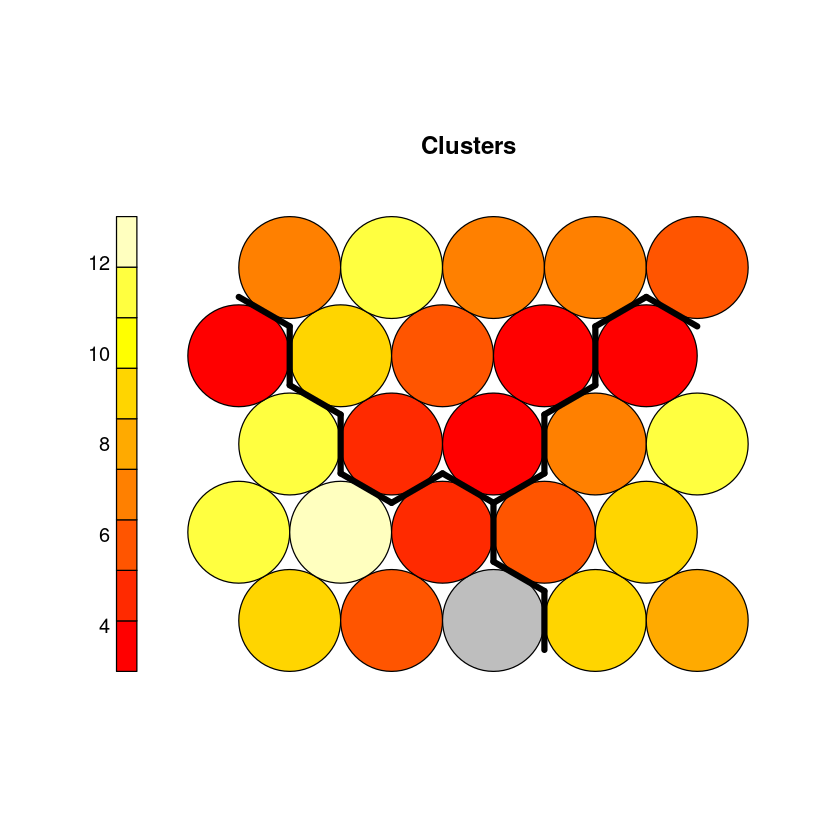

In [32]:
plot(som.wine, type="counts", bgcol = som_cluster, main = "Clusters", col=5)
add.cluster.boundaries(som.wine, som_cluster)

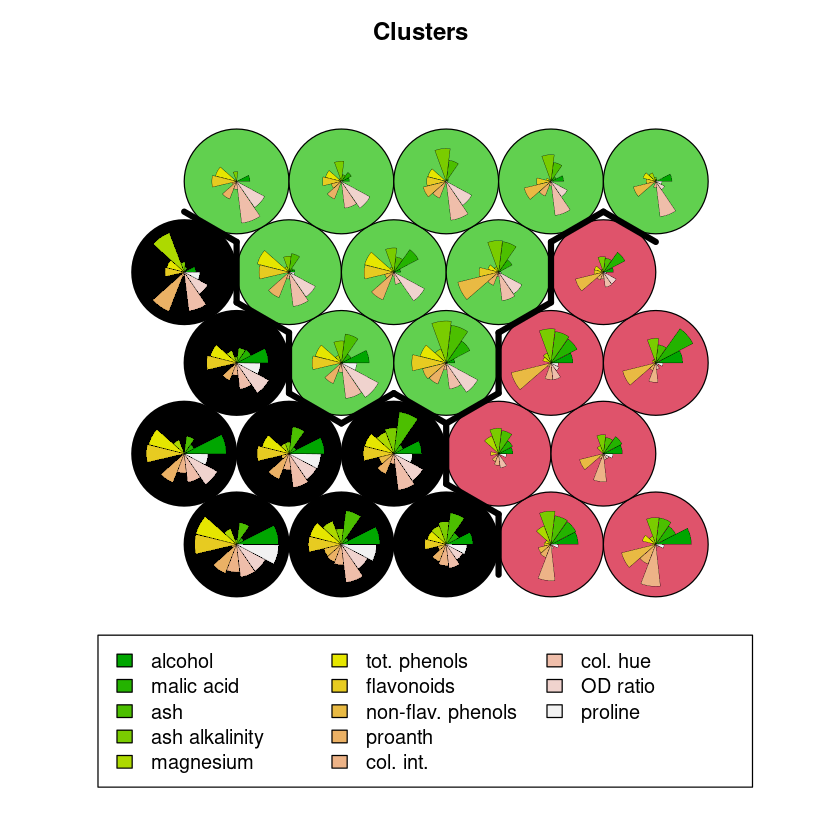

In [33]:
som_cluster <- cutree(hclust(dist(getCodes(som.wine))), 3)
plot(som.wine, type="codes", bgcol = som_cluster, main = "Clusters", col=5)
add.cluster.boundaries(som.wine, som_cluster)